In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda-11.8/lib64'

import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())


1.10.1
11.3
True


In [7]:
!python test.py --gpuid 0 --dataset "custom" --custom_dataset_path '../deep_homography_estimation/ms_coco_test_images' --checkpoint "./weight/mscoco.pth" --batch_size 1

{'batch_size': 1,
 'checkpoint': './weight/mscoco.pth',
 'custom_dataset_path': '../deep_homography_estimation/ms_coco_test_images',
 'dataset': 'custom',
 'downsample': [4, 2, 1],
 'epsilon': 0.1,
 'gpuid': 0,
 'iter': [2, 2, 2],
 'log_dir': 'logs',
 'log_full_dir': 'logs/2025-03-28-15_56_32_custom_',
 'loss': 'speedup',
 'lr': 0.0004,
 'mode': 'test',
 'nolog': False,
 'note': '',
 'num_steps': 120000,
 'print_freq': 100,
 'seed': 512,
 'speed_threshold': 1,
 'val_freq': 10000}
Traceback (most recent call last):
  File "test.py", line 83, in <module>
    main()
  File "test.py", line 80, in main
    test(args)
  File "test.py", line 22, in test
    test_loader = datasets.fetch_dataloader(args, split="test")
  File "/home/mayank.mds2023/CV/MCNet/datasets.py", line 168, in fetch_dataloader
    dataloader = DataLoader(dataset, batch_size=args.batch_size, pin_memory=True, shuffle=True, num_workers=16, drop_last=False)
  File "/home/mayank.mds2023/miniconda3/envs/test/lib/python3.8/site-p

In [ ]:
# os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
# os.environ['PATH'] = '/usr/local/cuda-11.8/bin' + os.environ['PATH']
# os.environ['CUDNN_INCLUDE_DIR'] = '/usr/local/cuda-11.8/include'
# os.environ['CUDNN_LIB_DIR'] = '/usr/local/cuda-11.8/lib64'
# os.environ['CUDNN_LIBRARY'] = '/usr/local/cuda-11.8/lib64/libcudnn.so.7.6.5'
# os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'

In [ ]:
# export PATH=/usr/local/cuda-11.8/bin:$PATH
# export LD_LIBRARY_PATH=/usr/local/cuda-11.8/lib64:$LD_LIBRARY_PATH
# export CUDA_HOME=/usr/local/cuda-11.8


In [2]:
import cupy; print(cupy.cuda.runtime.runtimeGetVersion())

11080


In [2]:
import cv2
from homo_utils import generate_homo

import matplotlib.pyplot as plt

In [34]:
homo_parameter = {"marginal":32, "perturb":32, "patch_size":128}
image_list_img1 = '/home/mayank.mds2023/CV/MCNet/Photos-002/20250402_135410.jpg'
image_list_img2 = '/home/mayank.mds2023/CV/MCNet/Photos-002/20250402_135412.jpg'


img1 = cv2.imread(image_list_img1)
img2 = cv2.imread(image_list_img2)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img1 = cv2.resize(img1, (320, 240))
img2 = cv2.resize(img2, (320, 240))
    
homo_parameter["height"], homo_parameter["width"], _ = img1.shape

patch_img1_warp, patch_img2, four_gt, org_pts, dst_pts, large_img1_warp, large_img2 = generate_homo(img1, img2, homo_parameter=homo_parameter, transform=None)
print(patch_img1_warp.shape, patch_img2.shape)

torch.Size([3, 128, 128]) torch.Size([3, 128, 128])


In [35]:
four_gt

array([[-30.,  10.],
       [-29., -30.],
       [-14., -26.],
       [-31.,  31.]], dtype=float32)

In [36]:
dst_pts

array([[  2.,  42.],
       [130.,   2.],
       [ 18., 133.],
       [128., 190.]], dtype=float32)

In [37]:
large_img1_warp.shape, large_img2.shape

(torch.Size([3, 192, 192]), torch.Size([3, 192, 192]))

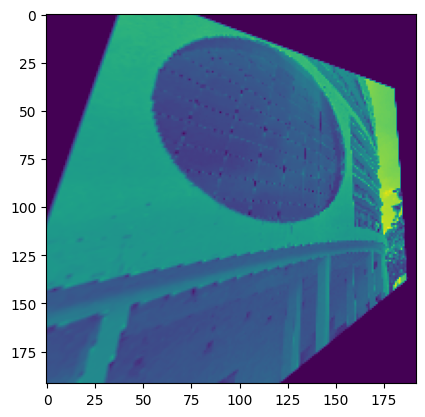

In [39]:
plt.imshow(large_img1_warp[0])

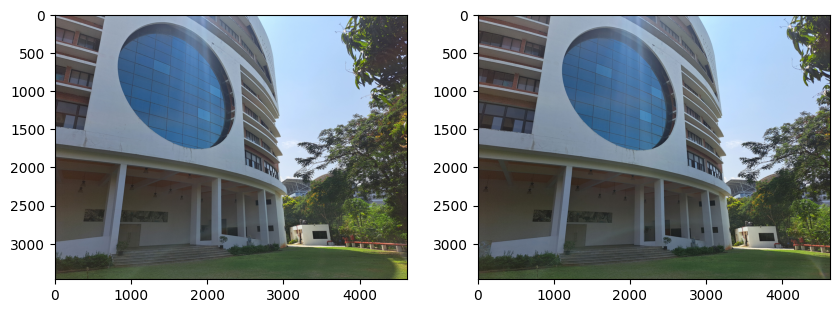

In [46]:
img1 = cv2.imread('Photos-002/20250402_135410.jpg')
img2 = cv2.imread('Photos-002/20250402_135412.jpg')
assert img1 is not None and img2 is not None

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
# plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.axis('off')
plt.show()

In [11]:
img1.shape

(3468, 4624, 3)

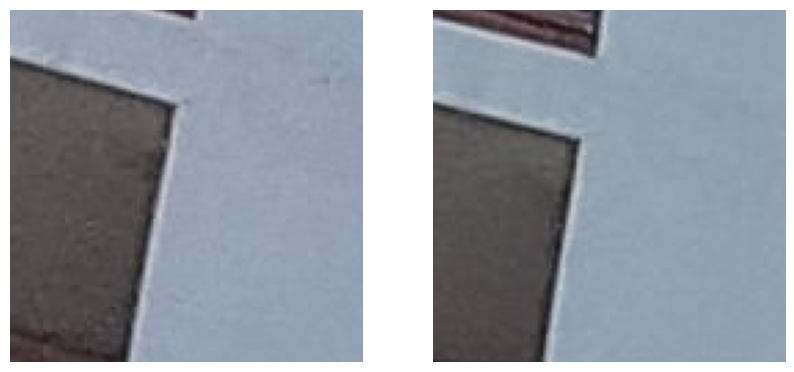

In [58]:
top_left = (500, 500)
bottom_right = (628, 628)

cropped_img1 = img1[top_left[0]:bottom_right[0], top_left[1]:bottom_right[1], :]
cropped_img2 = img2[top_left[0]+70:bottom_right[0]+70, top_left[1]+300:bottom_right[1]+300, :]

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(cropped_img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(cropped_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [59]:
cv2.imwrite('Photos-002/cropped_20250402_135410.jpg', cropped_img1)
cv2.imwrite('Photos-002/cropped_20250402_135412.jpg', cropped_img2)

True

In [60]:
import torch
cropped_img1.shape, torch.tensor(cropped_img1).permute(2, 0, 1).shape

((128, 128, 3), torch.Size([3, 128, 128]))

In [61]:
import numpy as np
prediction = np.array([[[-10.7379,  10.4223],
         [-11.5961,  13.2239],
         [-12.7184,  22.5875],
         [ -5.7171,   4.5378]]])